In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score
#import dataset
from sklearn.datasets import load_iris

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram

In [3]:
frame = load_iris(as_frame=True)

In [4]:
frame = load_iris(as_frame=True)
df = frame['data']
X = df.values
y = np.array(frame['target'])
y_map = {0: "setosa", 1: "versicolor", 2: "virginica"}
y_mapped = pd.DataFrame(y).iloc[:,0].map(y_map)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Sklearn routine
- Initialize method
- fit
- transfrom/predict

### Normalizations

In [5]:
scaler = StandardScaler()
scaler.fit(X)
X_scal = scaler.transform(X)

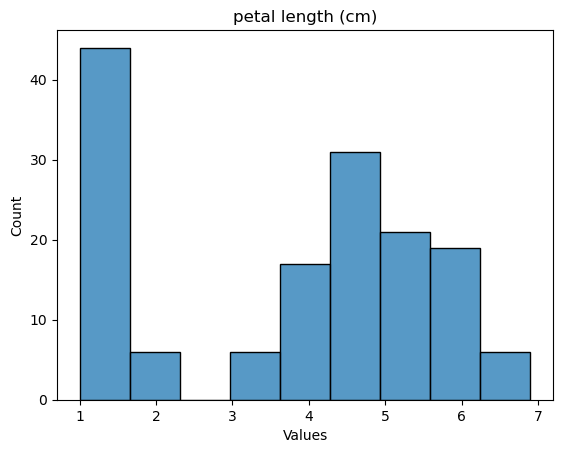

In [6]:
i = 2
sns.histplot(X[:,i])
plt.title(df.columns[i])
plt.xlabel("Values")
plt.show()

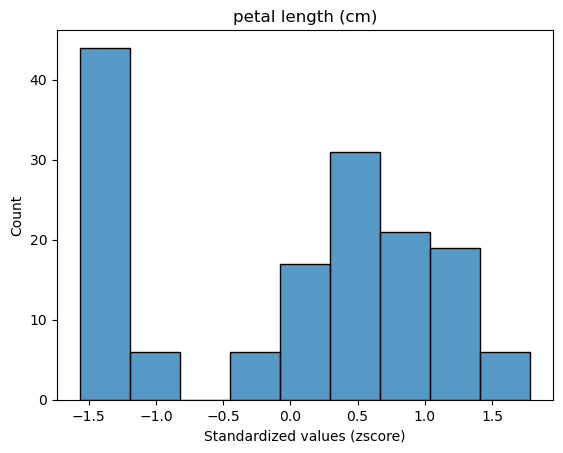

In [7]:
i = 2
sns.histplot(X_scal[:,i])
plt.title(df.columns[i])
plt.xlabel("Standardized values (zscore)")
plt.show()

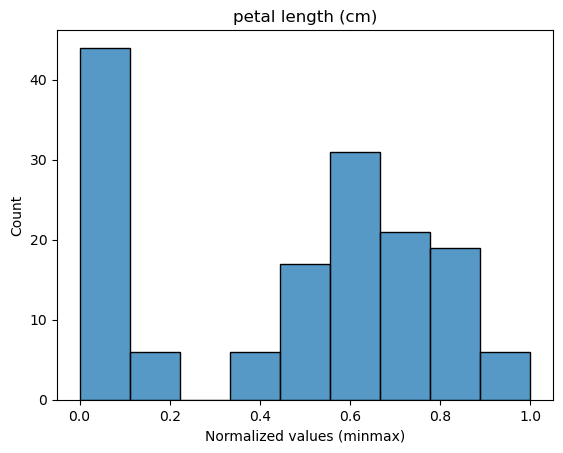

In [8]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

i = 2
sns.histplot(X_minmax[:,i])
plt.title(df.columns[i])
plt.xlabel("Normalized values (minmax)")
plt.show()

### Kmeans

In [9]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=100)
kmeans.fit(X_minmax)

KMeans(max_iter=100, n_clusters=3)

In [10]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

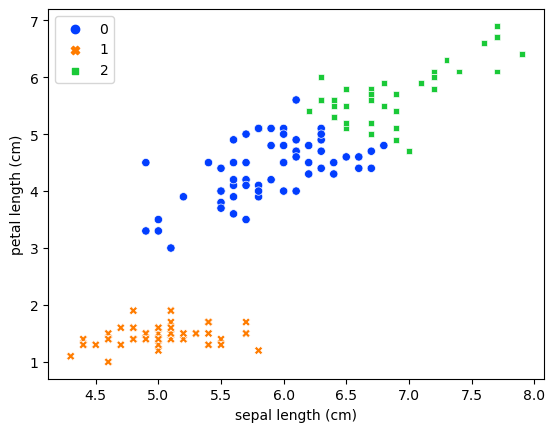

In [11]:
sns.scatterplot(data=df, x="sepal length (cm)", y="petal length (cm)", hue=kmeans.labels_, style=kmeans.labels_,
                palette="bright")
plt.show()

In [12]:
kmeans.cluster_centers_

array([[0.44125683, 0.30737705, 0.57571548, 0.54918033],
       [0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

In [13]:
centers = kmeans.cluster_centers_

In [14]:
centers = scaler.inverse_transform(centers)

In [15]:
df['kmeans_labels'] = kmeans.labels_
df['kmeans_labels'] = df['kmeans_labels'].map({0:"A", 1: "B", 2: "C"})

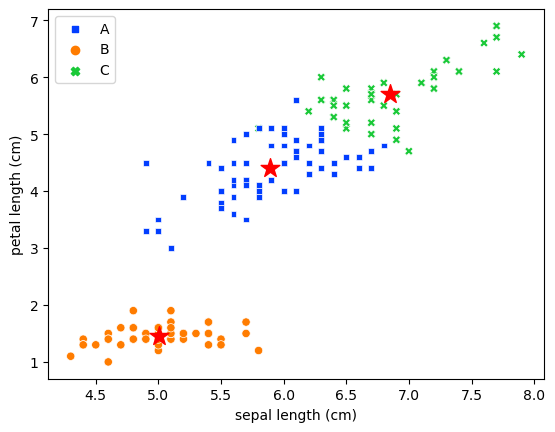

In [16]:
sns.scatterplot(data=df, x="sepal length (cm)", y="petal length (cm)", hue='kmeans_labels', style='kmeans_labels',
                palette="bright", hue_order=["A", "B", "C"])
plt.legend()
plt.scatter(centers[:,0], centers[:,2], c='red', marker='*', s=200)
plt.show()

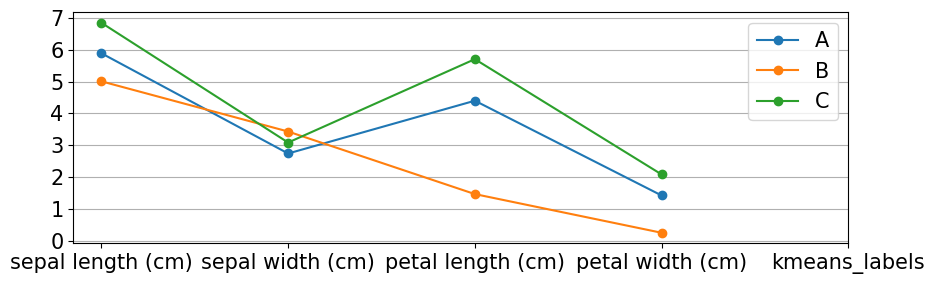

In [17]:
plt.figure(figsize=(10, 3))

clust_name = ['A', 'B', 'C']
for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i])
    
plt.xticks(range(0,len(df.columns)), df.columns, fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='best')
plt.grid(axis='y')

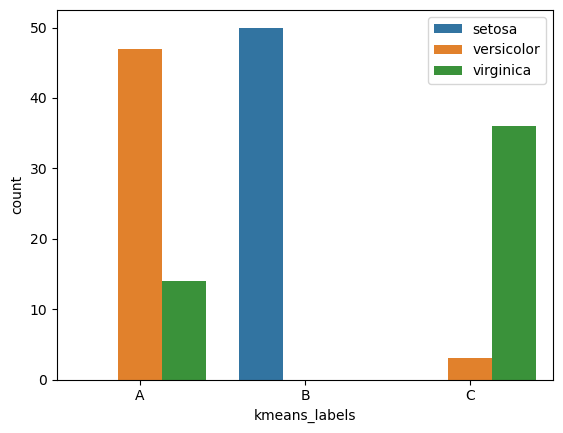

In [18]:
sns.countplot(data=df, x='kmeans_labels', hue=y_mapped, order=["A", "B", "C"])
plt.show()

In [19]:
y_mapped

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: 0, Length: 150, dtype: object

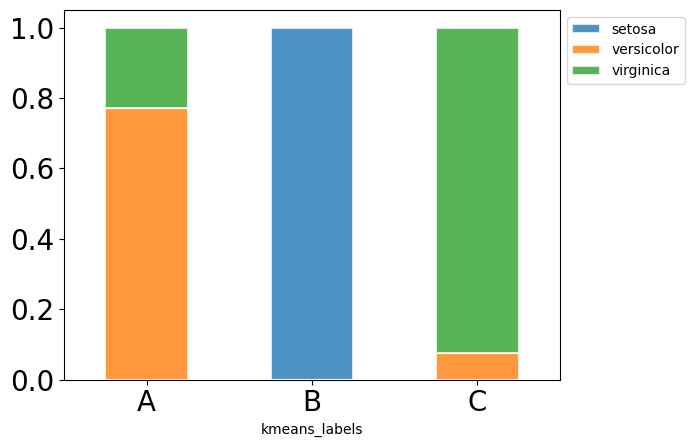

In [20]:
bar_pl = y_mapped.groupby(df['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.show()

In [21]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([61, 50, 39]))

In [22]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(X_minmax, kmeans.labels_))

SSE 6.982216473785234
Silhouette 0.5047687565398588


In [23]:
%%time
sse_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_minmax)
    sse_list.append(kmeans.inertia_)

CPU times: user 5.31 s, sys: 1.39 s, total: 6.7 s
Wall time: 1.68 s


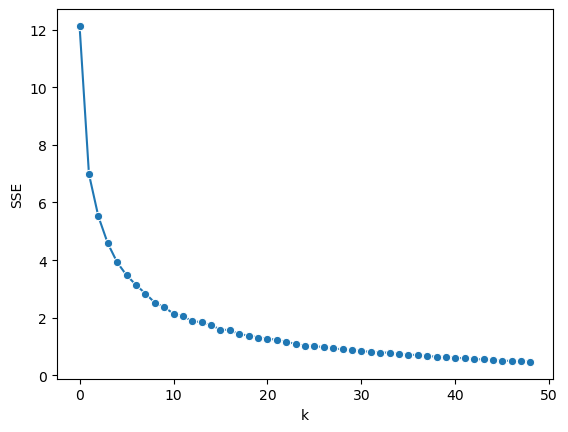

In [24]:
sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o')
plt.ylabel('SSE')
plt.xlabel('k')
plt.show()

### DBScan

In [25]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_minmax)

DBSCAN(eps=0.3)

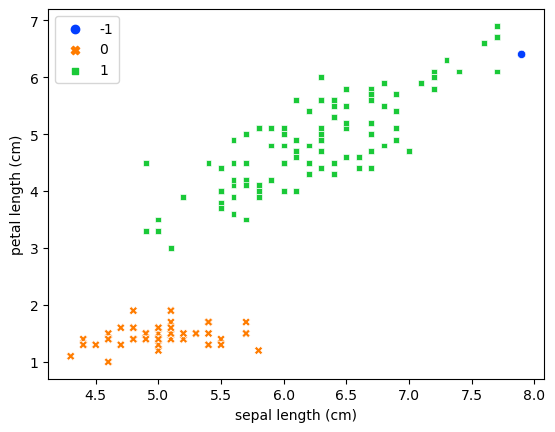

In [26]:
sns.scatterplot(data=df, x="sepal length (cm)", y="petal length (cm)", hue=dbscan.labels_, 
                style=dbscan.labels_, palette="bright")
plt.show()

### kth neighbor distance

In [27]:
dist = pdist(X_minmax, 'euclidean')
dist = squareform(dist)

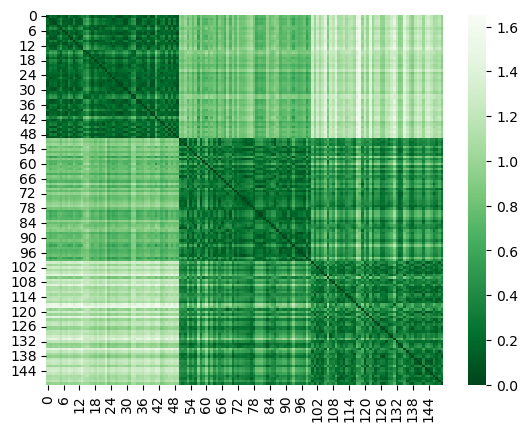

In [28]:
sns.heatmap(dist, cmap="Greens_r", annot=False)
plt.show()

In [29]:
k=5
kth_distances = []
for d in dist:  # d is a vector containing distances between the ith record and all the others
    index_kth_distance = np.argsort(d)[k]  # take the index of the kth nearest neighbor
    kth_distances.append(d[index_kth_distance])  # store the distance in a list

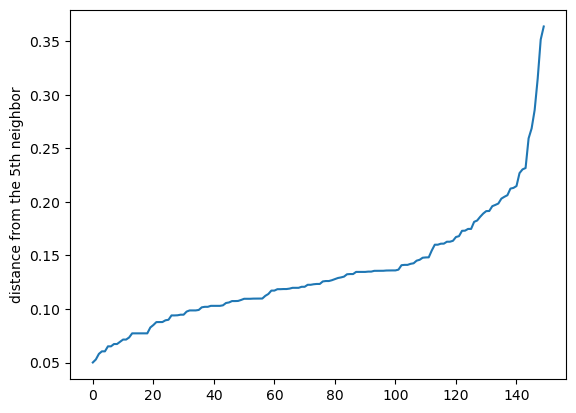

In [30]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('distance from the {}th neighbor'.format(k))
         
plt.show()

### Hierarchical

In [31]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [32]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='complete')
model = model.fit(X_minmax)

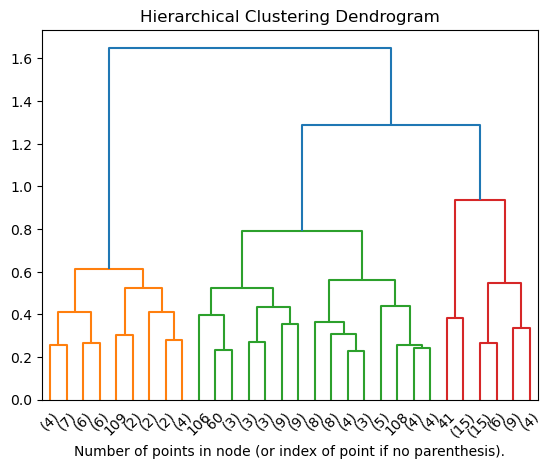

In [33]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

#### Choosing the number of clusters

In [34]:
hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
hier.fit(X_minmax)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [35]:
hier.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

#### Precomputed distance matrix

In [36]:
hier = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete')
hier.fit(dist)

AgglomerativeClustering(affinity='precomputed', linkage='complete')

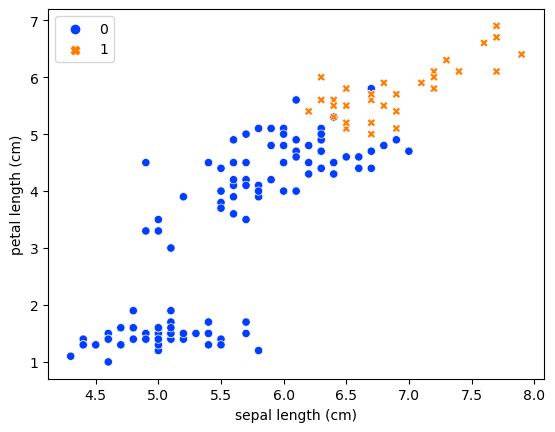

In [37]:
sns.scatterplot(data=df, x="sepal length (cm)", y="petal length (cm)", hue=hier.labels_, 
                style=hier.labels_, palette="bright")
plt.show()